In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Librairies importées avec succès")
print(f"Versions : pandas {pd.__version__}, numpy {np.__version__}")

Librairies importées avec succès
Versions : pandas 2.2.2, numpy 1.26.4


In [2]:
df = pd.read_csv('social_posts.csv')

# Afficher les premières lignes
print("Aperçu des données :")
print(df.head())

print(f"\nDimensions du dataset : {df.shape[0]} lignes, {df.shape[1]} colonnes")


Aperçu des données :
   post_id                 date   platform content_type  likes  comments  \
0        1  2025-01-15 09:00:00  Instagram     carousel    450        23   
1        2  2025-01-15 14:00:00   Facebook        image    320        15   
2        3  2025-01-15 18:00:00   LinkedIn      article    180        42   
3        4  2025-01-16 10:00:00  Instagram         reel    890        67   
4        5  2025-01-16 13:00:00    Twitter         text    210        34   

   shares  reach  impressions  
0      12   8500        12000  
1       8   6200         9500  
2      25   5400         7800  
3      45  15000        22000  
4      56   7800        11000  

Dimensions du dataset : 30 lignes, 9 colonnes


In [3]:
# Informations sur le dataset
print(" Informations sur le dataset :")
print(df.info())

print("\n Statistiques descriptives :")
print(df.describe())

# Vérifier les valeurs manquantes
print("\n Valeurs manquantes :")
print(df.isnull().sum())

 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       30 non-null     int64 
 1   date          30 non-null     object
 2   platform      30 non-null     object
 3   content_type  30 non-null     object
 4   likes         30 non-null     int64 
 5   comments      30 non-null     int64 
 6   shares        30 non-null     int64 
 7   reach         30 non-null     int64 
 8   impressions   30 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 2.2+ KB
None

 Statistiques descriptives :
         post_id        likes   comments     shares         reach  \
count  30.000000    30.000000  30.000000  30.000000     30.000000   
mean   15.500000   525.666667  43.400000  32.066667  10193.333333   
std     8.803408   261.832841  24.556199  21.136557   3458.017504   
min     1.000000   180.000000  12.000000   0

In [4]:
# Convertir la date en datetime
df['date'] = pd.to_datetime(df['date'])

# Extraire des informations temporelles
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.day

# Calculer l'engagement total
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']

# Calculer l'engagement rate (métrique clé)
df['engagement_rate'] = (df['total_engagement'] / df['impressions']) * 100

# Calculer le reach rate
df['reach_rate'] = (df['reach'] / df['impressions']) * 100

print(" Données transformées :")
print(df[['post_id', 'date', 'hour', 'total_engagement', 'engagement_rate']].head())


 Données transformées :
   post_id                date  hour  total_engagement  engagement_rate
0        1 2025-01-15 09:00:00     9               485         4.041667
1        2 2025-01-15 14:00:00    14               343         3.610526
2        3 2025-01-15 18:00:00    18               247         3.166667
3        4 2025-01-16 10:00:00    10              1002         4.554545
4        5 2025-01-16 13:00:00    13               300         2.727273


In [5]:
# Métriques globales
metriques = {
    'Nombre total de posts': df.shape[0],
    'Reach moyen': df['reach'].mean(),
    'Impressions moyennes': df['impressions'].mean(),
    'Engagement rate moyen (%)': df['engagement_rate'].mean(),
    'Likes moyens': df['likes'].mean(),
    'Commentaires moyens': df['comments'].mean(),
    'Partages moyens': df['shares'].mean(),
    'Engagement total': df['total_engagement'].sum()
}

print(" MÉTRIQUES CLÉS :")
print("=" * 50)
for key, value in metriques.items():
    if 'moyen' in key.lower() or '%' in key:
        print(f"{key:.<40} {value:>8.2f}")
    else:
        print(f"{key:.<40} {value:>8.0f}")

 MÉTRIQUES CLÉS :
Nombre total de posts...................       30
Reach moyen............................. 10193.33
Impressions moyennes.................... 14566.67
Engagement rate moyen (%)...............     3.97
Likes moyens............................   525.67
Commentaires moyens.....................    43.40
Partages moyens.........................    32.07
Engagement total........................    18034


In [6]:
# Agrégation par heure
hourly_performance = df.groupby('hour').agg({
    'total_engagement': 'mean',
    'reach': 'mean',
    'engagement_rate': 'mean',
    'post_id': 'count'
}).round(2)

hourly_performance.columns = ['Engagement Moyen', 'Reach Moyen', 'Engagement Rate (%)', 'Nombre de Posts']

# Trier par engagement moyen
hourly_performance = hourly_performance.sort_values('Engagement Moyen', ascending=False)

print(" PERFORMANCE PAR HEURE DE PUBLICATION :")
print("=" * 70)
print(hourly_performance.head(10))

# Identifier les 3 meilleurs horaires
top_3_hours = hourly_performance.head(3).index.tolist()
print(f"\n Top 3 des meilleurs horaires : {top_3_hours}h")

 PERFORMANCE PAR HEURE DE PUBLICATION :
      Engagement Moyen  Reach Moyen  Engagement Rate (%)  Nombre de Posts
hour                                                                     
16             1376.00     18500.00                 4.91                1
10             1037.50     15600.00                 4.51                2
11              941.00     13850.00                 4.73                2
12              666.00     10900.00                 4.23                2
17              656.00     10650.00                 4.16                2
15              645.00     10300.00                 4.20                2
18              630.00     10466.67                 3.85                3
19              586.00     10500.00                 4.26                2
7               527.00      9100.00                 3.90                1
9               446.33      9300.00                 3.80                3

 Top 3 des meilleurs horaires : [16, 10, 11]h


In [7]:
# Performance par plateforme
platform_stats = df.groupby('platform').agg({
    'post_id': 'count',
    'reach': 'sum',
    'impressions': 'sum',
    'total_engagement': 'sum',
    'engagement_rate': 'mean',
    'likes': 'sum',
    'comments': 'sum',
    'shares': 'sum'
}).round(2)

platform_stats.columns = ['Posts', 'Reach Total', 'Impressions', 'Engagement', 
                          'Engagement Rate (%)', 'Likes', 'Comments', 'Shares']

print(" PERFORMANCE PAR PLATEFORME :")
print("=" * 100)
print(platform_stats)

# Plateforme la plus performante
best_platform = platform_stats['Engagement Rate (%)'].idxmax()
print(f"\n Plateforme la plus performante : {best_platform}")



 PERFORMANCE PAR PLATEFORME :
           Posts  Reach Total  Impressions  Engagement  Engagement Rate (%)  \
platform                                                                      
Facebook       7        57800        85600        3583                 4.07   
Instagram     12       146700       207800        9019                 4.23   
LinkedIn       6        61600        86900        3617                 4.00   
Twitter        5        39700        56700        1815                 3.15   

           Likes  Comments  Shares  
platform                            
Facebook    3210       233     140  
Instagram   8110       559     350  
LinkedIn    3010       362     245  
Twitter     1440       148     227  

 Plateforme la plus performante : Instagram


In [8]:
# Analyse par type de contenu
content_stats = df.groupby('content_type').agg({
    'post_id': 'count',
    'engagement_rate': 'mean',
    'reach': 'mean',
    'total_engagement': 'sum'
}).round(2)

content_stats.columns = ['Nombre', 'Engagement Rate (%)', 'Reach Moyen', 'Engagement Total']
content_stats = content_stats.sort_values('Engagement Rate (%)', ascending=False)

print(" PERFORMANCE PAR TYPE DE CONTENU :")
print("=" * 70)
print(content_stats)

best_content = content_stats['Engagement Rate (%)'].idxmax()
print(f"\n Type de contenu le plus performant : {best_content}")

 PERFORMANCE PAR TYPE DE CONTENU :
              Nombre  Engagement Rate (%)  Reach Moyen  Engagement Total
content_type                                                            
video              4                 4.70     12625.00              3468
reel               4                 4.61     16875.00              4648
carousel           4                 4.20     10175.00              2528
story              2                 3.84      9850.00               757
image              9                 3.80      8933.33              4410
article            2                 3.52      6800.00               693
text               5                 3.22      6680.00              1530

 Type de contenu le plus performant : video


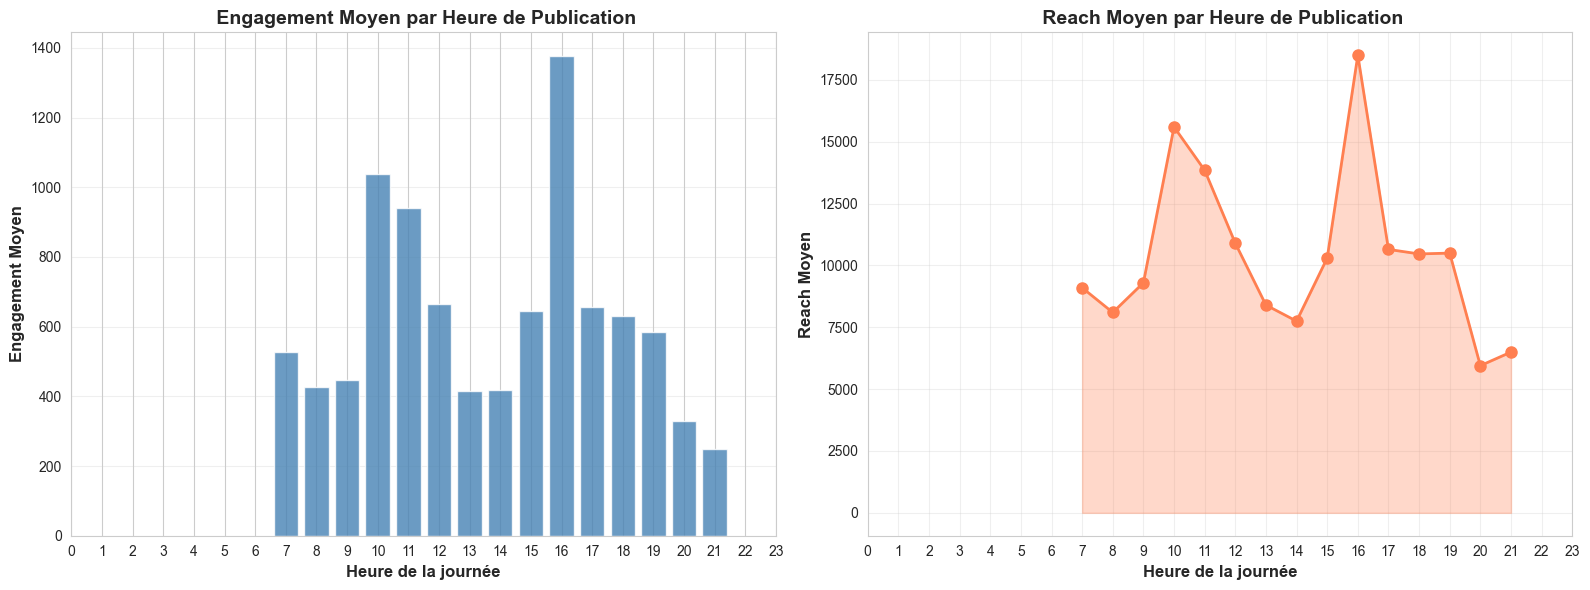

In [ ]:
# Visualisation des meilleurs horaires
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Engagement par heure
hourly_engagement = df.groupby('hour')['total_engagement'].mean().sort_index()
ax1.bar(hourly_engagement.index, hourly_engagement.values, color='steelblue', alpha=0.8)
ax1.set_xlabel('Heure de la journée', fontsize=12, fontweight='bold')
ax1.set_ylabel('Engagement Moyen', fontsize=12, fontweight='bold')
ax1.set_title(' Engagement Moyen par Heure de Publication', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticks(range(24))

# Graphique 2 : Reach par heure
hourly_reach = df.groupby('hour')['reach'].mean().sort_index()
ax2.plot(hourly_reach.index, hourly_reach.values, marker='o', linewidth=2, 
         color='coral', markersize=8)
ax2.fill_between(hourly_reach.index, hourly_reach.values, alpha=0.3, color='coral')
ax2.set_xlabel('Heure de la journée', fontsize=12, fontweight='bold')
ax2.set_ylabel('Reach Moyen', fontsize=12, fontweight='bold')
ax2.set_title(' Reach Moyen par Heure de Publication', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_xticks(range(24))

plt.tight_layout()
plt.show()

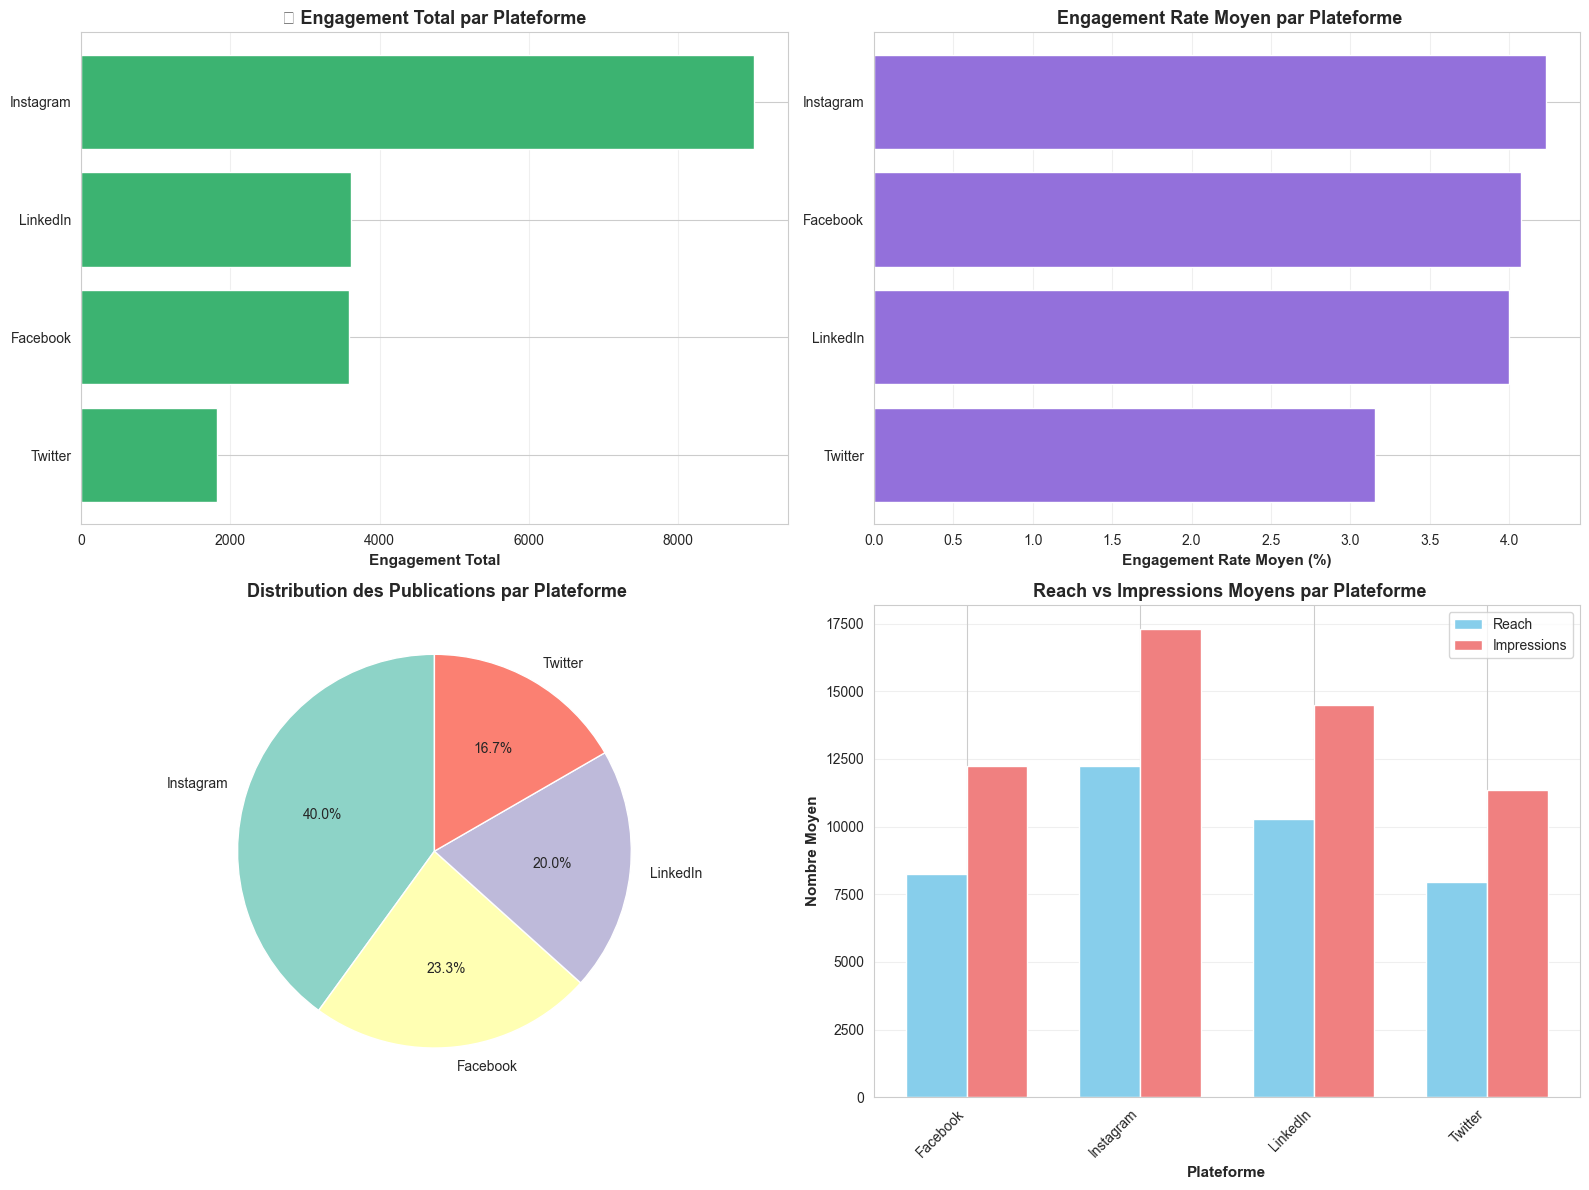

In [10]:
# Visualisation de performance par plateforme
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Engagement par plateforme
platform_engagement = df.groupby('platform')['total_engagement'].sum().sort_values(ascending=True)
ax1.barh(platform_engagement.index, platform_engagement.values, color='mediumseagreen')
ax1.set_xlabel('Engagement Total', fontsize=11, fontweight='bold')
ax1.set_title('📱 Engagement Total par Plateforme', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2. Engagement Rate par plateforme
platform_rate = df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=True)
ax2.barh(platform_rate.index, platform_rate.values, color='mediumpurple')
ax2.set_xlabel('Engagement Rate Moyen (%)', fontsize=11, fontweight='bold')
ax2.set_title(' Engagement Rate Moyen par Plateforme', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Distribution des posts par plateforme
platform_counts = df['platform'].value_counts()
colors = plt.cm.Set3(range(len(platform_counts)))
ax3.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax3.set_title(' Distribution des Publications par Plateforme', fontsize=13, fontweight='bold')

# 4. Reach vs Impressions par plateforme
platform_reach_imp = df.groupby('platform')[['reach', 'impressions']].mean()
x = np.arange(len(platform_reach_imp))
width = 0.35
ax4.bar(x - width/2, platform_reach_imp['reach'], width, label='Reach', color='skyblue')
ax4.bar(x + width/2, platform_reach_imp['impressions'], width, label='Impressions', color='lightcoral')
ax4.set_xlabel('Plateforme', fontsize=11, fontweight='bold')
ax4.set_ylabel('Nombre Moyen', fontsize=11, fontweight='bold')
ax4.set_title(' Reach vs Impressions Moyens par Plateforme', fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(platform_reach_imp.index, rotation=45, ha='right')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


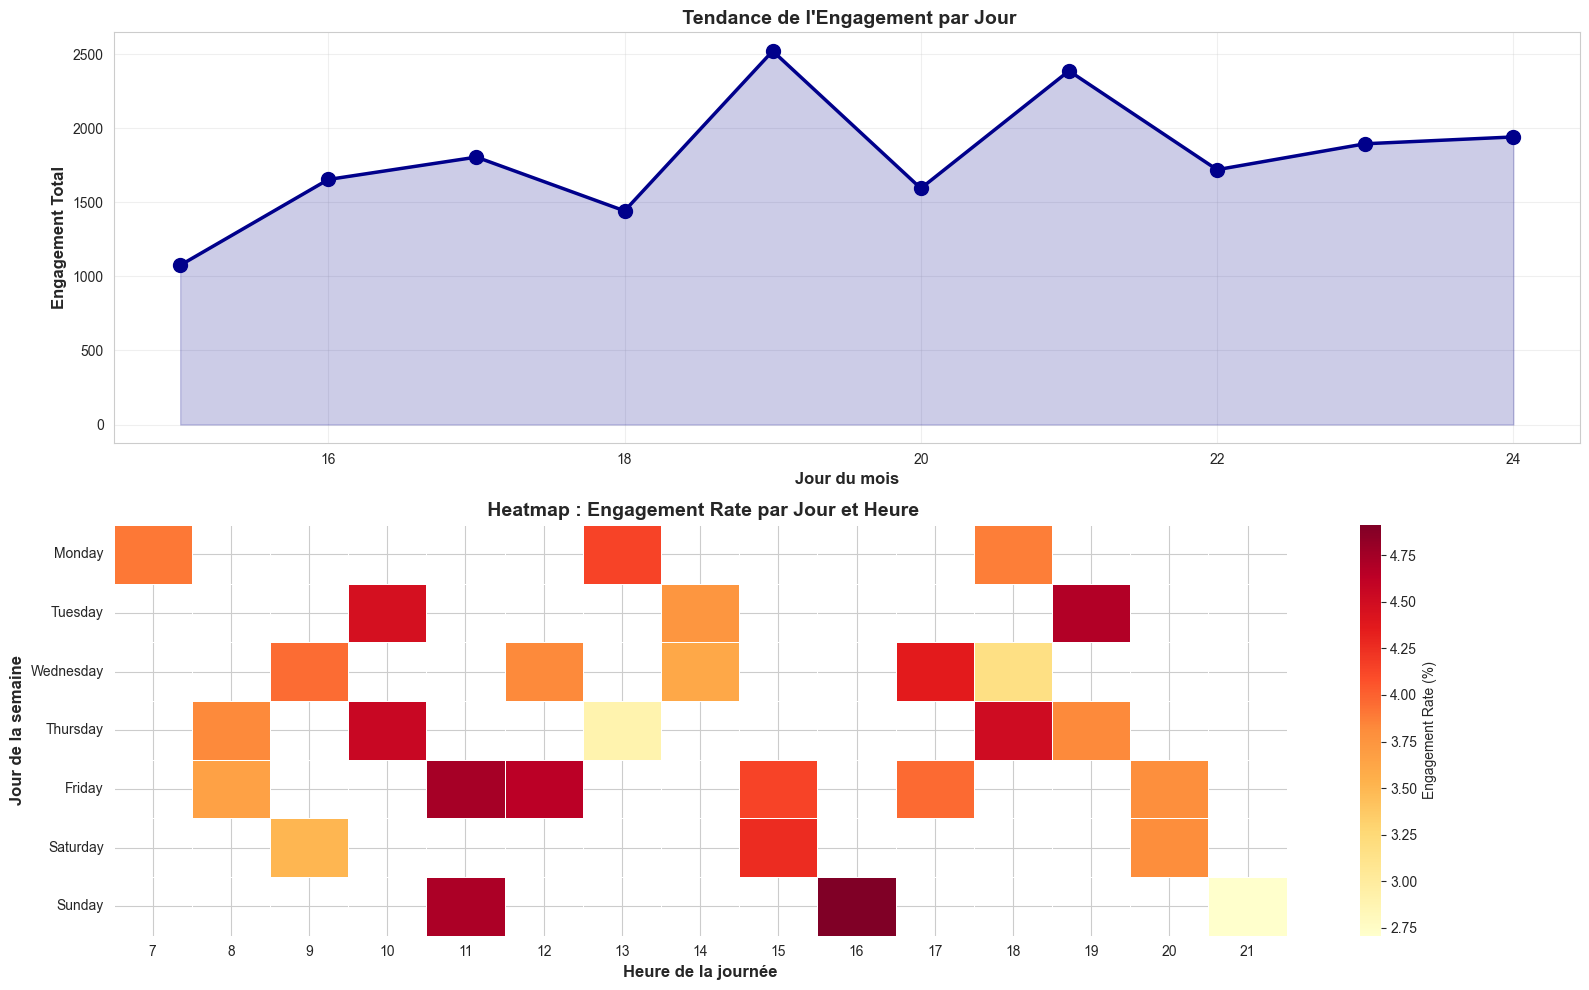

In [11]:
# Tendances dans le temps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# 1. Engagement par jour
daily_engagement = df.groupby('day')['total_engagement'].sum().sort_index()
ax1.plot(daily_engagement.index, daily_engagement.values, marker='o', linewidth=2.5, 
         color='darkblue', markersize=10)
ax1.fill_between(daily_engagement.index, daily_engagement.values, alpha=0.2, color='darkblue')
ax1.set_xlabel('Jour du mois', fontsize=12, fontweight='bold')
ax1.set_ylabel('Engagement Total', fontsize=12, fontweight='bold')
ax1.set_title(' Tendance de l\'Engagement par Jour', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# 2. Heatmap : Jour de la semaine vs Heure
pivot_data = df.pivot_table(values='engagement_rate', 
                             index='day_of_week', 
                             columns='hour', 
                             aggfunc='mean')

# Réordonner les jours de la semaine
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex([d for d in day_order if d in pivot_data.index])

sns.heatmap(pivot_data, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Engagement Rate (%)'},
            ax=ax2, linewidths=0.5)
ax2.set_xlabel('Heure de la journée', fontsize=12, fontweight='bold')
ax2.set_ylabel('Jour de la semaine', fontsize=12, fontweight='bold')
ax2.set_title(' Heatmap : Engagement Rate par Jour et Heure', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


 TOP 10 DES POSTS LES PLUS PERFORMANTS :
 post_id  platform content_type  hour  total_engagement  engagement_rate  reach
      14 Instagram         reel    16              1376         4.914286  18500
      28  LinkedIn        video    11               986         4.740385  14500
      13  LinkedIn        video    11               896         4.715789  13200
      21  Facebook        video    19               820         4.685714  11800
       8  Facebook        video    12               766         4.642424  11000
       4 Instagram         reel    10              1002         4.554545  15000
      27 Instagram         reel    18              1197         4.516981  17800
      19 Instagram         reel    10              1073         4.470833  16200
      24 Instagram     carousel    17               749         4.354651  11500
      11 Instagram     carousel    15               673         4.259494  10500


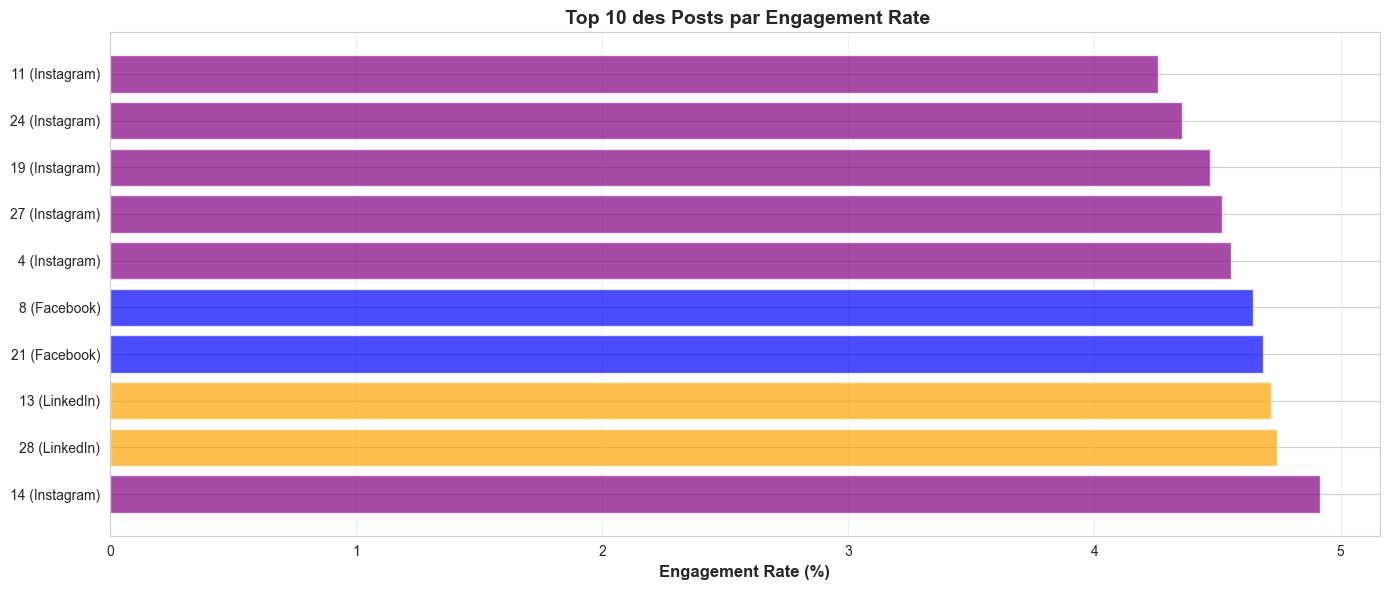

In [13]:
# Top 10 des posts les plus performants
top_posts = df.nlargest(10, 'engagement_rate')[
    ['post_id', 'platform', 'content_type', 'hour', 'total_engagement', 'engagement_rate', 'reach']
]

print(" TOP 10 DES POSTS LES PLUS PERFORMANTS :")
print("=" * 100)
print(top_posts.to_string(index=False))

# Visualisation des top posts
plt.figure(figsize=(14, 6))
colors_map = {'Facebook': 'blue', 'Instagram': 'purple', 'Twitter': 'skyblue', 'LinkedIn': 'orange'}
colors = [colors_map.get(p, 'gray') for p in top_posts['platform']]

plt.barh(range(len(top_posts)), top_posts['engagement_rate'], color=colors, alpha=0.7)
plt.yticks(range(len(top_posts)), 
           [f"{row['post_id']} ({row['platform']})" for _, row in top_posts.iterrows()])
plt.xlabel('Engagement Rate (%)', fontsize=12, fontweight='bold')
plt.title(' Top 10 des Posts par Engagement Rate', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [33]:
print("=" * 80)
print("RÉPONSES AUX QUESTIONS THÉORIQUES".center(80))
print("=" * 80)
reponse = """

1) Pourquoi utiliser des first-party cookies plutôt que des third-party cookies ?
      
| First-party cookies                             | Third-party cookies                       |
| ----------------------------------------------- | ----------------------------------------- |
| Stockés par le site que l’utilisateur visite    | Stockés par un domaine externe            |
| Utilisés pour analytics, authentification       | Utilisés pour le retargeting publicitaire |
| Respecte mieux la vie privée                    |  Beaucoup bloqués par Chrome, Firefox  |
| Ne seront pas supprimés dans les futures règles | Seront totalement supprimés               |

Conclusion:
➡ Ils sont plus fiables, moins bloqués par les navigateurs et respectent la confidentialité.

2) Différence entre pixel synchrone et asynchrone ?
● Pixel synchrone

- Se charge en même temps que la page
- Si le pixel ne répond pas → la page ralentit
- Obsolète

● Pixel asynchrone
      
- Se charge en arrière-plan    
- N’impacte pas la vitesse de la page
- Utilisé aujourd’hui : Facebook Pixel, Google Tag

Conclusion
➡ On utilise asynchrone pour éviter de ralentir le site et pour une meilleure fiabilité.
"""
print(reponse)



                       RÉPONSES AUX QUESTIONS THÉORIQUES                        


1) Pourquoi utiliser des first-party cookies plutôt que des third-party cookies ?
      
| First-party cookies                             | Third-party cookies                       |
| ----------------------------------------------- | ----------------------------------------- |
| Stockés par le site que l’utilisateur visite    | Stockés par un domaine externe            |
| Utilisés pour analytics, authentification       | Utilisés pour le retargeting publicitaire |
| Respecte mieux la vie privée                    |  Beaucoup bloqués par Chrome, Firefox  |
| Ne seront pas supprimés dans les futures règles | Seront totalement supprimés               |

Conclusion:
➡ Ils sont plus fiables, moins bloqués par les navigateurs et respectent la confidentialité.

2) Différence entre pixel synchrone et asynchrone ?
● Pixel synchrone

- Se charge en même temps que la page
- Si le pixel ne répond pas → la page r